## Basic Python Programming

#### 1.variables and list : Basic Python operations are demonstrated, such as creating variables, lists, and dictionaries. 
#### 2.loop and conditional statments : A loop is used to iterate over financial data, and conditional statements are applied to classify profits as "strong" or "moderate."


In [206]:

bank_name = "Deutsche Bank"
current_year = 2025


years = [2020, 2021, 2022, 2023, 2024]
profits = [5.7, 4.2, 6.1, 7.8, 8.3]  # Profits in billion euros (example data)


financial_data = {year: profit for year, profit in zip(years, profits)}


for year, profit in financial_data.items():
    if profit > 6.0:
        print(f"In {year}, {bank_name} had strong profits of {profit} billion euros.")
    else:
        print(f"In {year}, {bank_name} had moderate profits of {profit} billion euros.")


highest_profit_year = max(financial_data, key=financial_data.get)
print(f"The highest profit was in {highest_profit_year} with {financial_data[highest_profit_year]} billion euros.")



In 2020, Deutsche Bank had moderate profits of 5.7 billion euros.
In 2021, Deutsche Bank had moderate profits of 4.2 billion euros.
In 2022, Deutsche Bank had strong profits of 6.1 billion euros.
In 2023, Deutsche Bank had strong profits of 7.8 billion euros.
In 2024, Deutsche Bank had strong profits of 8.3 billion euros.
The highest profit was in 2024 with 8.3 billion euros.


#### Analysing the yearly profit from the dataset arguments like data_coloumn,profit_column,Convert the date column to datetime
#### Extract year and group by it

In [207]:
def analyze_yearly_profit(dataframe, date_column, profit_column):
    """
    Analyzes yearly profit trends from a financial dataset.

    Args:
        dataframe (pd.DataFrame): The financial dataset.
        date_column (str): The column name containing dates.
        profit_column (str): The column name containing profit (Net_Income).

    Returns:
        pd.DataFrame: A summary of yearly profits.
    """
    
    dataframe[date_column] = pd.to_datetime(dataframe[date_column])

    
    dataframe['Year'] = dataframe[date_column].dt.year
    yearly_profit = dataframe.groupby('Year')[profit_column].sum().reset_index()

    
    yearly_profit.columns = ['Year', 'Total_Profit']

  
    yearly_profit['Trend'] = yearly_profit['Total_Profit'].apply(
        lambda x: 'Positive' if x > 0 else 'Negative'
    )

    return yearly_profit


yearly_profit_summary = analyze_yearly_profit(df, 'Date', 'Net_Income')


yearly_profit_summary

,Year,Total_Profit,Trend
0,2015,9.778352e+08,Positive
1,2016,9.819464e+08,Positive
2,2017,2.178754e+08,Positive


# Import the Packages

#### loading the dataset using pandas, numpy, matplotlib and seaborn 

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## About Dataset



**_About Dataset_**

*This dataset presents the financial performance of the bank, including key metrics like operating income, net income, and balance sheet indicators. It spans 800 records over time, making it suitable for financial analysis, modeling, and machine learning projects. The dataset can be used for tasks like performance evaluation, ratio analysis, and forecasting.*

**_Date:_**

*The date corresponding to each financial record (from January 2015 onwards).*

**_Operating_Income:_**

*The income generated from the bank's core business operations.*

**_Expenses:_**

*Total costs incurred during operations.*

**_Net_Income:_**

*Profit after subtracting expenses from operating income.*

**_Assets:_**

*Total assets owned by the bank (e.g., cash, investments).*

**_Liabilities:_**

*The total debts and obligations owed.*

**_Equity:_**

*Shareholders' equity, representing the net value of assets minus liabilities.*

**_Debt_to_Equity:_**

*A financial ratio showing the proportion of debt compared to equity.*

**_ROA (Return on Assets):_**

*A profitability metric calculated as net income divided by total assets.*

**_Revenue:_**

*Total income from all operations and activities.*

**_Cash_Flow:_**

*The net cash generated or used in operations.*

**_Profit_Margin:_**

*A ratio showing the percentage of revenue that remains as profit.*

**_Interest_Expense:_**

*Costs associated with the bank's borrowings or debts.*

**_Tax_Expense:_**

*The amount paid as taxes on profits.*

**_Dividend_Payout:_**

*The portion of earnings distributed to shareholders as dividends.*

# Reading the dataset 

#### reading the dataset from the path where, I have placed the file of bank_financial_performance.

In [209]:
df = pd.read_csv(r'C:\Users\snehi\OneDrive\datasets\deutsche_bank_financial_performance.csv')

In [210]:
df

,Date,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout
0,1/1/2015,4370861.07,3682573.85,1.363403e+08,1.494296e+08,59803407.08,9435946.42,1428845.20,688287.22,2.50,0.01,0.07,609472.14,1042103.16,1170151.42
1,1/2/2015,9556428.76,1186425.69,1.955172e+08,4.725052e+07,55281922.53,12470620.28,1029017.28,8370003.06,0.85,0.04,0.67,699770.11,1329539.73,492998.93
2,1/3/2015,7587945.48,3093297.62,1.519954e+08,1.756590e+08,27447676.11,11882092.09,7320721.28,4494647.86,6.40,0.03,0.38,337977.34,345091.11,1603358.92
3,1/4/2015,6387926.36,3230217.71,2.097483e+08,1.382626e+08,87293509.41,4000698.76,1925965.75,3157708.65,1.58,0.02,0.79,1345468.95,1316373.62,426566.77
4,1/5/2015,2404167.76,2408588.02,8.124073e+07,2.773058e+08,70924670.47,3940243.11,6659376.16,-4420.26,3.91,0.00,0.00,175614.54,136655.30,2808563.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3/6/2017,8849115.18,3102741.13,2.056449e+08,2.121410e+08,49789633.12,6165216.72,4084005.16,5746374.05,4.26,0.03,0.93,627993.14,835552.46,892162.90
796,3/7/2017,9389064.54,1733723.00,1.195069e+08,3.776259e+08,40096106.11,4135728.96,3164629.81,7655341.54,9.42,0.06,1.85,1046559.67,240065.80,707605.75
797,3/8/2017,6086198.65,857387.16,6.145149e+07,3.530014e+08,45511508.38,12181098.60,5618837.98,5228811.49,7.76,0.09,0.43,726107.79,1160927.80,1420453.37
798,3/9/2017,7269857.41,885462.12,3.406201e+08,5.897583e+07,57694652.82,3592472.21,5466741.19,6384395.29,1.02,0.02,1.78,937145.92,1402043.77,2734468.89


# Data Manipulation

### Inspecting the dataset

In [211]:
df

,Date,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout
0,1/1/2015,4370861.07,3682573.85,1.363403e+08,1.494296e+08,59803407.08,9435946.42,1428845.20,688287.22,2.50,0.01,0.07,609472.14,1042103.16,1170151.42
1,1/2/2015,9556428.76,1186425.69,1.955172e+08,4.725052e+07,55281922.53,12470620.28,1029017.28,8370003.06,0.85,0.04,0.67,699770.11,1329539.73,492998.93
2,1/3/2015,7587945.48,3093297.62,1.519954e+08,1.756590e+08,27447676.11,11882092.09,7320721.28,4494647.86,6.40,0.03,0.38,337977.34,345091.11,1603358.92
3,1/4/2015,6387926.36,3230217.71,2.097483e+08,1.382626e+08,87293509.41,4000698.76,1925965.75,3157708.65,1.58,0.02,0.79,1345468.95,1316373.62,426566.77
4,1/5/2015,2404167.76,2408588.02,8.124073e+07,2.773058e+08,70924670.47,3940243.11,6659376.16,-4420.26,3.91,0.00,0.00,175614.54,136655.30,2808563.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,3/6/2017,8849115.18,3102741.13,2.056449e+08,2.121410e+08,49789633.12,6165216.72,4084005.16,5746374.05,4.26,0.03,0.93,627993.14,835552.46,892162.90
796,3/7/2017,9389064.54,1733723.00,1.195069e+08,3.776259e+08,40096106.11,4135728.96,3164629.81,7655341.54,9.42,0.06,1.85,1046559.67,240065.80,707605.75
797,3/8/2017,6086198.65,857387.16,6.145149e+07,3.530014e+08,45511508.38,12181098.60,5618837.98,5228811.49,7.76,0.09,0.43,726107.79,1160927.80,1420453.37
798,3/9/2017,7269857.41,885462.12,3.406201e+08,5.897583e+07,57694652.82,3592472.21,5466741.19,6384395.29,1.02,0.02,1.78,937145.92,1402043.77,2734468.89


#### data frame reading the head () is for first five columns

In [212]:
df.head()

,Date,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout
0,1/1/2015,4370861.07,3682573.85,1.363403e+08,1.494296e+08,59803407.08,9435946.42,1428845.20,688287.22,2.50,0.01,0.07,609472.14,1042103.16,1170151.42
1,1/2/2015,9556428.76,1186425.69,1.955172e+08,4.725052e+07,55281922.53,12470620.28,1029017.28,8370003.06,0.85,0.04,0.67,699770.11,1329539.73,492998.93
2,1/3/2015,7587945.48,3093297.62,1.519954e+08,1.756590e+08,27447676.11,11882092.09,7320721.28,4494647.86,6.40,0.03,0.38,337977.34,345091.11,1603358.92
3,1/4/2015,6387926.36,3230217.71,2.097483e+08,1.382626e+08,87293509.41,4000698.76,1925965.75,3157708.65,1.58,0.02,0.79,1345468.95,1316373.62,426566.77
4,1/5/2015,2404167.76,2408588.02,8.124073e+07,2.773058e+08,70924670.47,3940243.11,6659376.16,-4420.26,3.91,0.00,0.00,175614.54,136655.30,2808563.51


#### Using shape()The dataset has 800 rows and 16 columns, indicating a substantial amount of financial data over time.

In [213]:
df.shape

(800, 15)

#### Describe() function use for Basic statistics (mean, min, max, etc.) are calculated for numerical columns, providing an overview of the distribution of financial metrics 

In [214]:
df.describe()

,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,800.000000,800.000000,800.000000,8.000000e+02,8.000000e+02,8.000000e+02
mean,5.472607e+06,2.750536e+06,2.745014e+08,2.101557e+08,5.420719e+07,8.405125e+06,4.230626e+06,2.722071e+06,5.534388,0.013925,0.422700,1.042662e+06,7.715606e+05,1.481638e+06
std,2.642462e+06,1.318118e+06,1.293282e+08,1.106503e+08,2.585677e+07,3.709090e+06,2.156428e+06,2.962315e+06,5.387372,0.021340,0.602213,5.503283e+05,4.203083e+05,8.290883e+05
min,1.045554e+06,5.208441e+05,5.070430e+07,2.000442e+07,1.005881e+07,2.000399e+06,5.070756e+05,-3.751341e+06,0.240000,-0.040000,-1.530000,1.074449e+05,5.034946e+04,1.011645e+05
25%,3.172831e+06,1.559479e+06,1.642343e+08,1.208971e+08,3.101375e+07,5.225549e+06,2.439659e+06,4.515648e+05,2.067500,0.000000,0.060000,5.558731e+05,4.004082e+05,7.526477e+05
50%,5.560746e+06,2.771217e+06,2.790011e+08,2.081138e+08,5.370513e+07,8.500112e+06,4.122872e+06,2.742666e+06,3.840000,0.010000,0.320000,1.043596e+06,7.558056e+05,1.453308e+06
75%,7.783024e+06,3.827811e+06,3.858434e+08,3.066159e+08,7.734042e+07,1.148399e+07,6.061861e+06,4.974149e+06,6.905000,0.020000,0.630000,1.521543e+06,1.159785e+06,2.147992e+06
max,9.997459e+06,4.997362e+06,4.992564e+08,3.991719e+08,9.996019e+07,1.497074e+07,7.990947e+06,9.111469e+06,35.450000,0.130000,3.590000,1.998975e+06,1.498851e+06,2.996824e+06


#### columns function user looking out the no. of columns in dataset

In [215]:
df.columns

Index(['Date', 'Operating_Income', 'Expenses', 'Assets', 'Liabilities',
       'Equity', 'Revenue', 'Cash_Flow', 'Net_Income', 'Debt_to_Equity', 'ROA',
       'Profit_Margin', 'Interest_Expense', 'Tax_Expense', 'Dividend_Payout'],
      dtype='object')

In [216]:
df.head

<bound method NDFrame.head of           Date  Operating_Income    Expenses        Assets   Liabilities  \
0     1/1/2015        4370861.07  3682573.85  1.363403e+08  1.494296e+08   
1     1/2/2015        9556428.76  1186425.69  1.955172e+08  4.725052e+07   
2     1/3/2015        7587945.48  3093297.62  1.519954e+08  1.756590e+08   
3     1/4/2015        6387926.36  3230217.71  2.097483e+08  1.382626e+08   
4     1/5/2015        2404167.76  2408588.02  8.124073e+07  2.773058e+08   
..         ...               ...         ...           ...           ...   
795   3/6/2017        8849115.18  3102741.13  2.056449e+08  2.121410e+08   
796   3/7/2017        9389064.54  1733723.00  1.195069e+08  3.776259e+08   
797   3/8/2017        6086198.65   857387.16  6.145149e+07  3.530014e+08   
798   3/9/2017        7269857.41   885462.12  3.406201e+08  5.897583e+07   
799  3/10/2017        9302494.43  4523858.94  3.366060e+08  1.692377e+08   

          Equity      Revenue   Cash_Flow  Net_Income  De

#### data frame reading the tail () is for last five columns

In [217]:
df.tail

<bound method NDFrame.tail of           Date  Operating_Income    Expenses        Assets   Liabilities  \
0     1/1/2015        4370861.07  3682573.85  1.363403e+08  1.494296e+08   
1     1/2/2015        9556428.76  1186425.69  1.955172e+08  4.725052e+07   
2     1/3/2015        7587945.48  3093297.62  1.519954e+08  1.756590e+08   
3     1/4/2015        6387926.36  3230217.71  2.097483e+08  1.382626e+08   
4     1/5/2015        2404167.76  2408588.02  8.124073e+07  2.773058e+08   
..         ...               ...         ...           ...           ...   
795   3/6/2017        8849115.18  3102741.13  2.056449e+08  2.121410e+08   
796   3/7/2017        9389064.54  1733723.00  1.195069e+08  3.776259e+08   
797   3/8/2017        6086198.65   857387.16  6.145149e+07  3.530014e+08   
798   3/9/2017        7269857.41   885462.12  3.406201e+08  5.897583e+07   
799  3/10/2017        9302494.43  4523858.94  3.366060e+08  1.692377e+08   

          Equity      Revenue   Cash_Flow  Net_Income  De

#### used index function to see the range index(start,stop,step)

In [218]:
df.index

RangeIndex(start=0, stop=800, step=1)

#### using info() function finding the all dtype 

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              800 non-null    object 
 1   Operating_Income  800 non-null    float64
 2   Expenses          800 non-null    float64
 3   Assets            800 non-null    float64
 4   Liabilities       800 non-null    float64
 5   Equity            800 non-null    float64
 6   Revenue           800 non-null    float64
 7   Cash_Flow         800 non-null    float64
 8   Net_Income        800 non-null    float64
 9   Debt_to_Equity    800 non-null    float64
 10  ROA               800 non-null    float64
 11  Profit_Margin     800 non-null    float64
 12  Interest_Expense  800 non-null    float64
 13  Tax_Expense       800 non-null    float64
 14  Dividend_Payout   800 non-null    float64
dtypes: float64(14), object(1)
memory usage: 93.9+ KB


#### finding the all the null values

In [220]:
df.isnull().sum()

Date                0
Operating_Income    0
Expenses            0
Assets              0
Liabilities         0
Equity              0
Revenue             0
Cash_Flow           0
Net_Income          0
Debt_to_Equity      0
ROA                 0
Profit_Margin       0
Interest_Expense    0
Tax_Expense         0
Dividend_Payout     0
dtype: int64

### Cleaning the dataset

#### checking for missing values

In [221]:
missingvalues = df.isnull().sum()
print("Missing values in each column:")
print(missingvalues)


Missing values in each column:
Date                0
Operating_Income    0
Expenses            0
Assets              0
Liabilities         0
Equity              0
Revenue             0
Cash_Flow           0
Net_Income          0
Debt_to_Equity      0
ROA                 0
Profit_Margin       0
Interest_Expense    0
Tax_Expense         0
Dividend_Payout     0
dtype: int64


### convert data into datatime

In [222]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [223]:
df

,Date,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Net_Income,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout
0,2015-01-01,4370861.07,3682573.85,1.363403e+08,1.494296e+08,59803407.08,9435946.42,1428845.20,688287.22,2.50,0.01,0.07,609472.14,1042103.16,1170151.42
1,2015-01-02,9556428.76,1186425.69,1.955172e+08,4.725052e+07,55281922.53,12470620.28,1029017.28,8370003.06,0.85,0.04,0.67,699770.11,1329539.73,492998.93
2,2015-01-03,7587945.48,3093297.62,1.519954e+08,1.756590e+08,27447676.11,11882092.09,7320721.28,4494647.86,6.40,0.03,0.38,337977.34,345091.11,1603358.92
3,2015-01-04,6387926.36,3230217.71,2.097483e+08,1.382626e+08,87293509.41,4000698.76,1925965.75,3157708.65,1.58,0.02,0.79,1345468.95,1316373.62,426566.77
4,2015-01-05,2404167.76,2408588.02,8.124073e+07,2.773058e+08,70924670.47,3940243.11,6659376.16,-4420.26,3.91,0.00,0.00,175614.54,136655.30,2808563.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2017-03-06,8849115.18,3102741.13,2.056449e+08,2.121410e+08,49789633.12,6165216.72,4084005.16,5746374.05,4.26,0.03,0.93,627993.14,835552.46,892162.90
796,2017-03-07,9389064.54,1733723.00,1.195069e+08,3.776259e+08,40096106.11,4135728.96,3164629.81,7655341.54,9.42,0.06,1.85,1046559.67,240065.80,707605.75
797,2017-03-08,6086198.65,857387.16,6.145149e+07,3.530014e+08,45511508.38,12181098.60,5618837.98,5228811.49,7.76,0.09,0.43,726107.79,1160927.80,1420453.37
798,2017-03-09,7269857.41,885462.12,3.406201e+08,5.897583e+07,57694652.82,3592472.21,5466741.19,6384395.29,1.02,0.02,1.78,937145.92,1402043.77,2734468.89


In [224]:
conversion_errors = df['Date'].isnull().sum()
print(f"Number of conversion errors in 'Date' column: {conversion_errors}")

Number of conversion errors in 'Date' column: 0


In [225]:
df.dtypes

Date                datetime64[ns]
Operating_Income           float64
Expenses                   float64
Assets                     float64
Liabilities                float64
Equity                     float64
Revenue                    float64
Cash_Flow                  float64
Net_Income                 float64
Debt_to_Equity             float64
ROA                        float64
Profit_Margin              float64
Interest_Expense           float64
Tax_Expense                float64
Dividend_Payout            float64
dtype: object

In [226]:
df.isnull().sum()

Date                0
Operating_Income    0
Expenses            0
Assets              0
Liabilities         0
Equity              0
Revenue             0
Cash_Flow           0
Net_Income          0
Debt_to_Equity      0
ROA                 0
Profit_Margin       0
Interest_Expense    0
Tax_Expense         0
Dividend_Payout     0
dtype: int64

#### finding the duplicates in dataset

In [227]:
df.duplicated().sum()

0

#### Step 1: Filter data where Net_Income exceeds 1 million euros
#### Step 2: Sort the filtered data by Net_Income in descending order
#### Step 3: Group by year to calculate total Operating_Income and Net_Income

In [228]:
filtered_data = df[df['Net_Income'] > 1_000_000]
sorted_data = filtered_data.sort_values(by='Net_Income', ascending=False)
df['Date'] = pd.to_datetime(df['Date'])  
df['Year'] = df['Date'].dt.year  

grouped_data = df.groupby('Year').agg(
    Total_Operating_Income=('Operating_Income', 'sum'),
    Total_Net_Income=('Net_Income', 'sum')
).reset_index()

sorted_data.head(), grouped_data.head()

(          Date  Operating_Income   Expenses        Assets  Liabilities  \
 390 2016-01-26        9914546.28  803077.71  3.944808e+08  290454666.2   
 464 2016-04-09        9659552.94  552292.43  7.338046e+07  185913392.1   
 247 2015-09-05        9699893.37  609803.52  1.388617e+08  210152435.4   
 518 2016-06-02        9885485.16  867334.92  8.755884e+07  180599094.9   
 475 2016-04-20        9936683.17  972185.80  4.417603e+08  201007578.7   
 
           Equity      Revenue   Cash_Flow  Net_Income  Debt_to_Equity   ROA  \
 390  95630034.31   4408599.05  2991293.92  9111468.57            3.04  0.02   
 464  59604396.57  10780928.59  7788839.76  9107260.51            3.12  0.12   
 247  74359014.52   3565815.42  4464924.53  9090089.85            2.83  0.07   
 518  49851832.29   4551825.93  1571107.28  9018150.24            3.62  0.10   
 475  35294477.52   8289433.02  2206112.03  8964497.36            5.70  0.02   
 
      Profit_Margin  Interest_Expense  Tax_Expense  Dividend_Payou

# Mathematical operations

#### I have calculated total net Income, Average operating Income and Expenses, Net Income percentage 

In [229]:

total_net_income = df['Net_Income'].sum()
avg_operating_income = df['Operating_Income'].mean()
avg_expenses = df['Expenses'].mean()
df['Net_Income_Percentage'] = (df['Net_Income'] / df['Revenue']) * 100
print("Total Net Income:", total_net_income)
print("Average Operating Income:", avg_operating_income)
print("Average Expenses:", avg_expenses)
df[['Date', 'Net_Income', 'Revenue', 'Net_Income_Percentage']].head()

Total Net Income: 2177656980.3199997
Average Operating Income: 5472606.9296
Average Expenses: 2750535.7042375


,Date,Net_Income,Revenue,Net_Income_Percentage
0,2015-01-01,688287.22,9435946.42,7.294310
1,2015-01-02,8370003.06,12470620.28,67.117777
2,2015-01-03,4494647.86,11882092.09,37.827075
3,2015-01-04,3157708.65,4000698.76,78.928928
4,2015-01-05,-4420.26,3940243.11,-0.112182


# Data Visualization


#### Visualizing the total net income in line plot

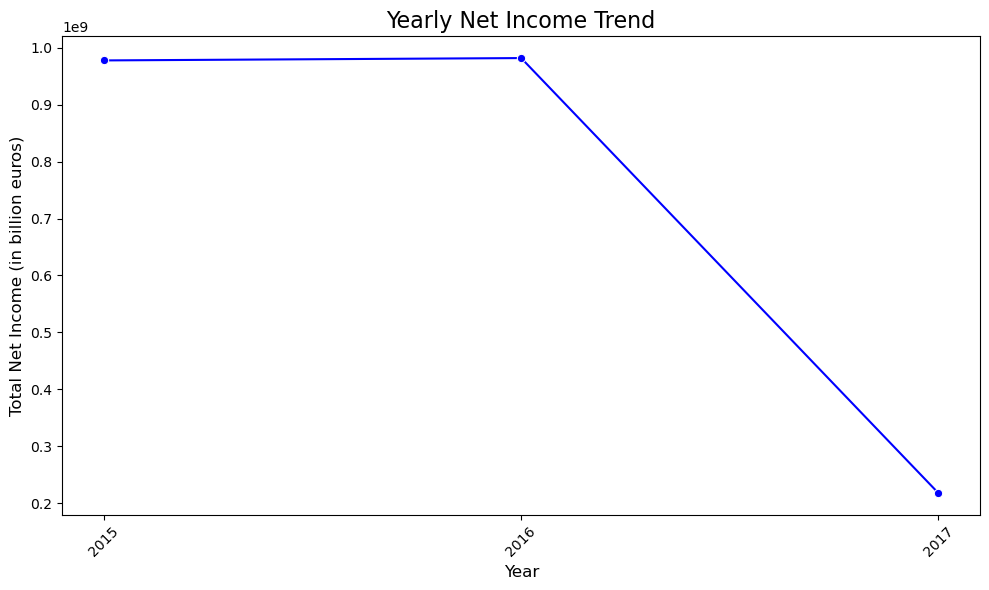

In [230]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_profit_summary, x='Year', y='Total_Profit', marker='o', color='blue')
plt.title('Yearly Net Income Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Net Income (in billion euros)', fontsize=12)
plt.xticks(yearly_profit_summary['Year'], rotation=45)
plt.tight_layout()
plt.show()

#### visualizing the Net Income Distribution

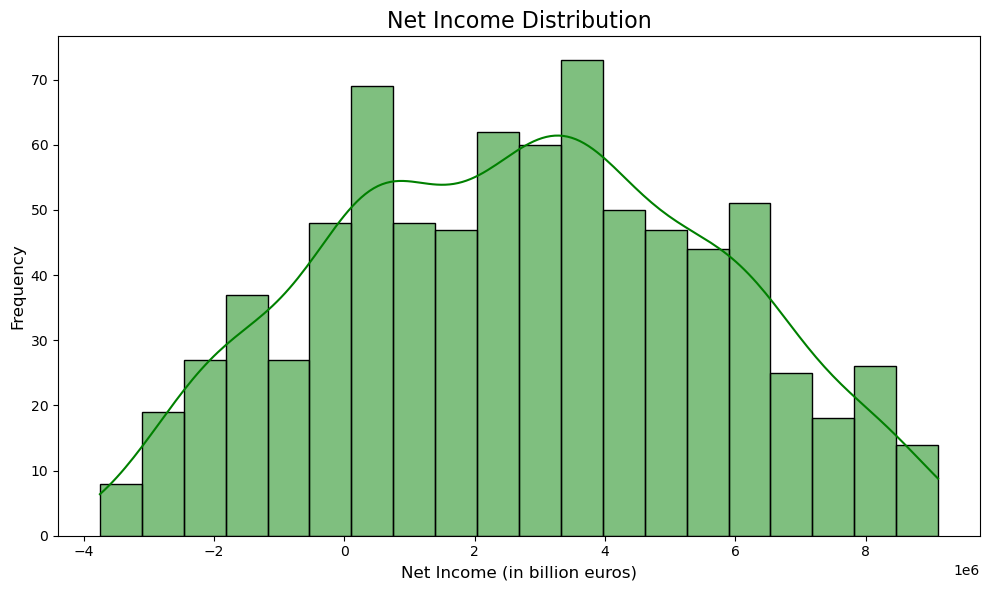

In [231]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Net_Income'], bins=20, kde=True, color='green')
plt.title('Net Income Distribution', fontsize=16)
plt.xlabel('Net Income (in billion euros)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

#### Visualizing the heatmap

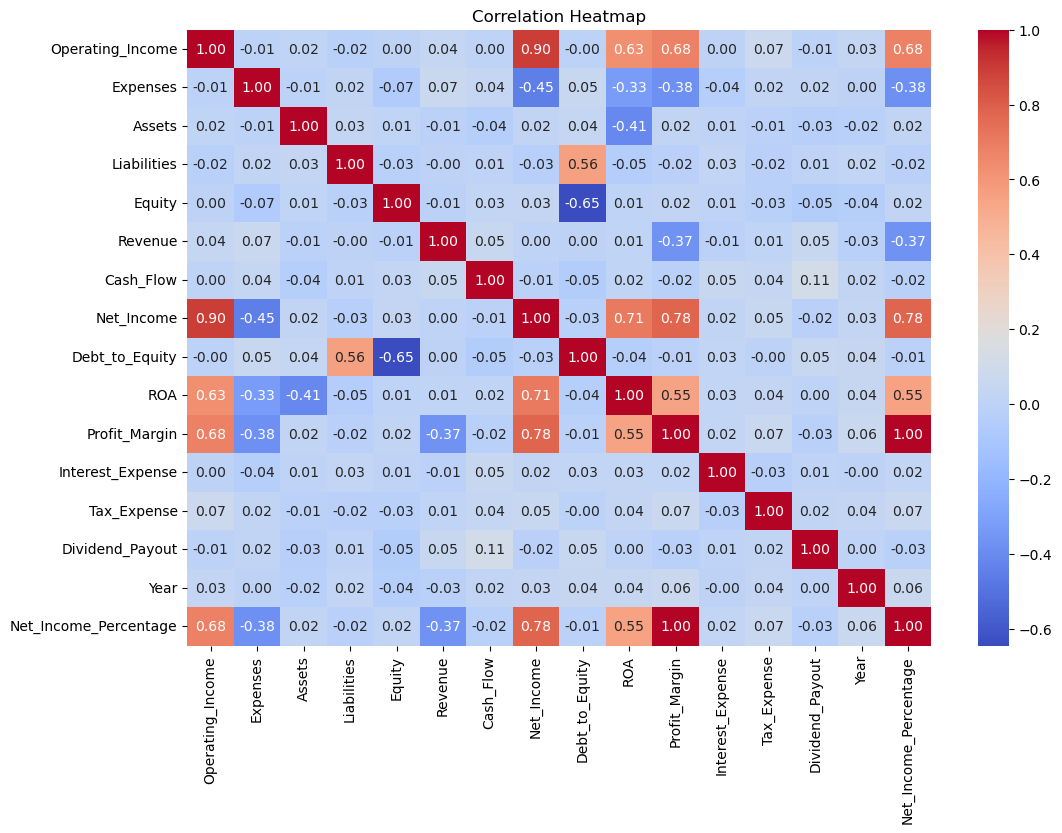

In [232]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### Generating the Net Income By Year,Add the year column to the main dataframe for plotting,boxplot for Net Income by Year

C:\Users\snehi\AppData\Local\Temp\ipykernel_41032\793526875.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='Net_Income', palette='coolwarm')


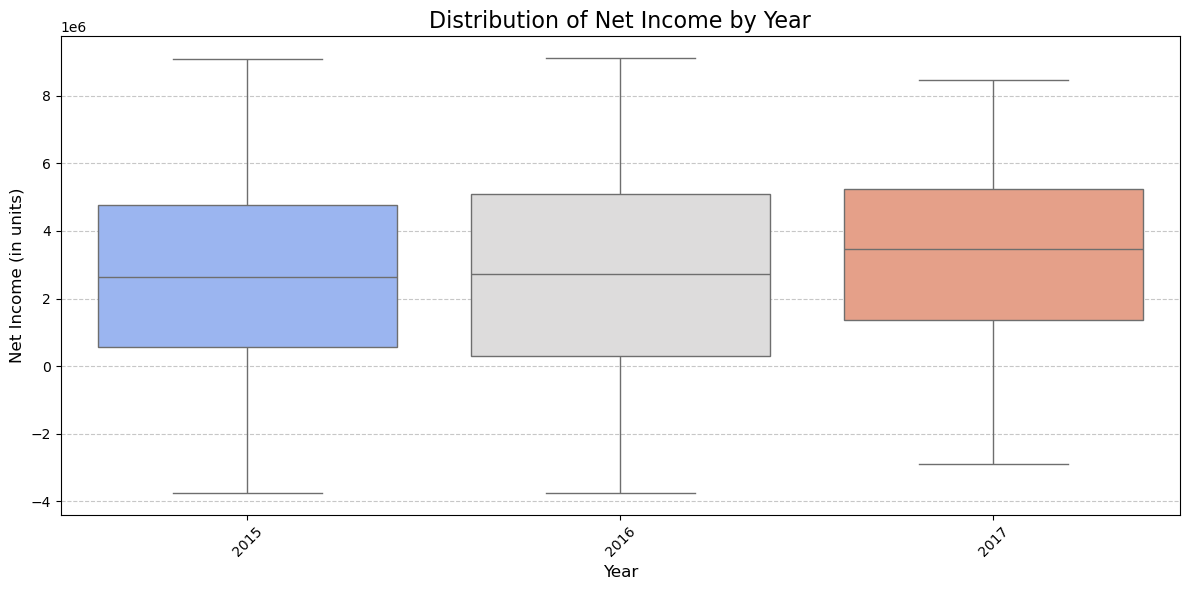

In [233]:

yearly_profit_summary = analyze_yearly_profit(df, 'Date', 'Net_Income')
df['Year'] = pd.to_datetime(df['Date']).dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Year', y='Net_Income', palette='coolwarm')
plt.title('Distribution of Net Income by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Income (in units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot

plt.show()


Analysing the trends of operating income

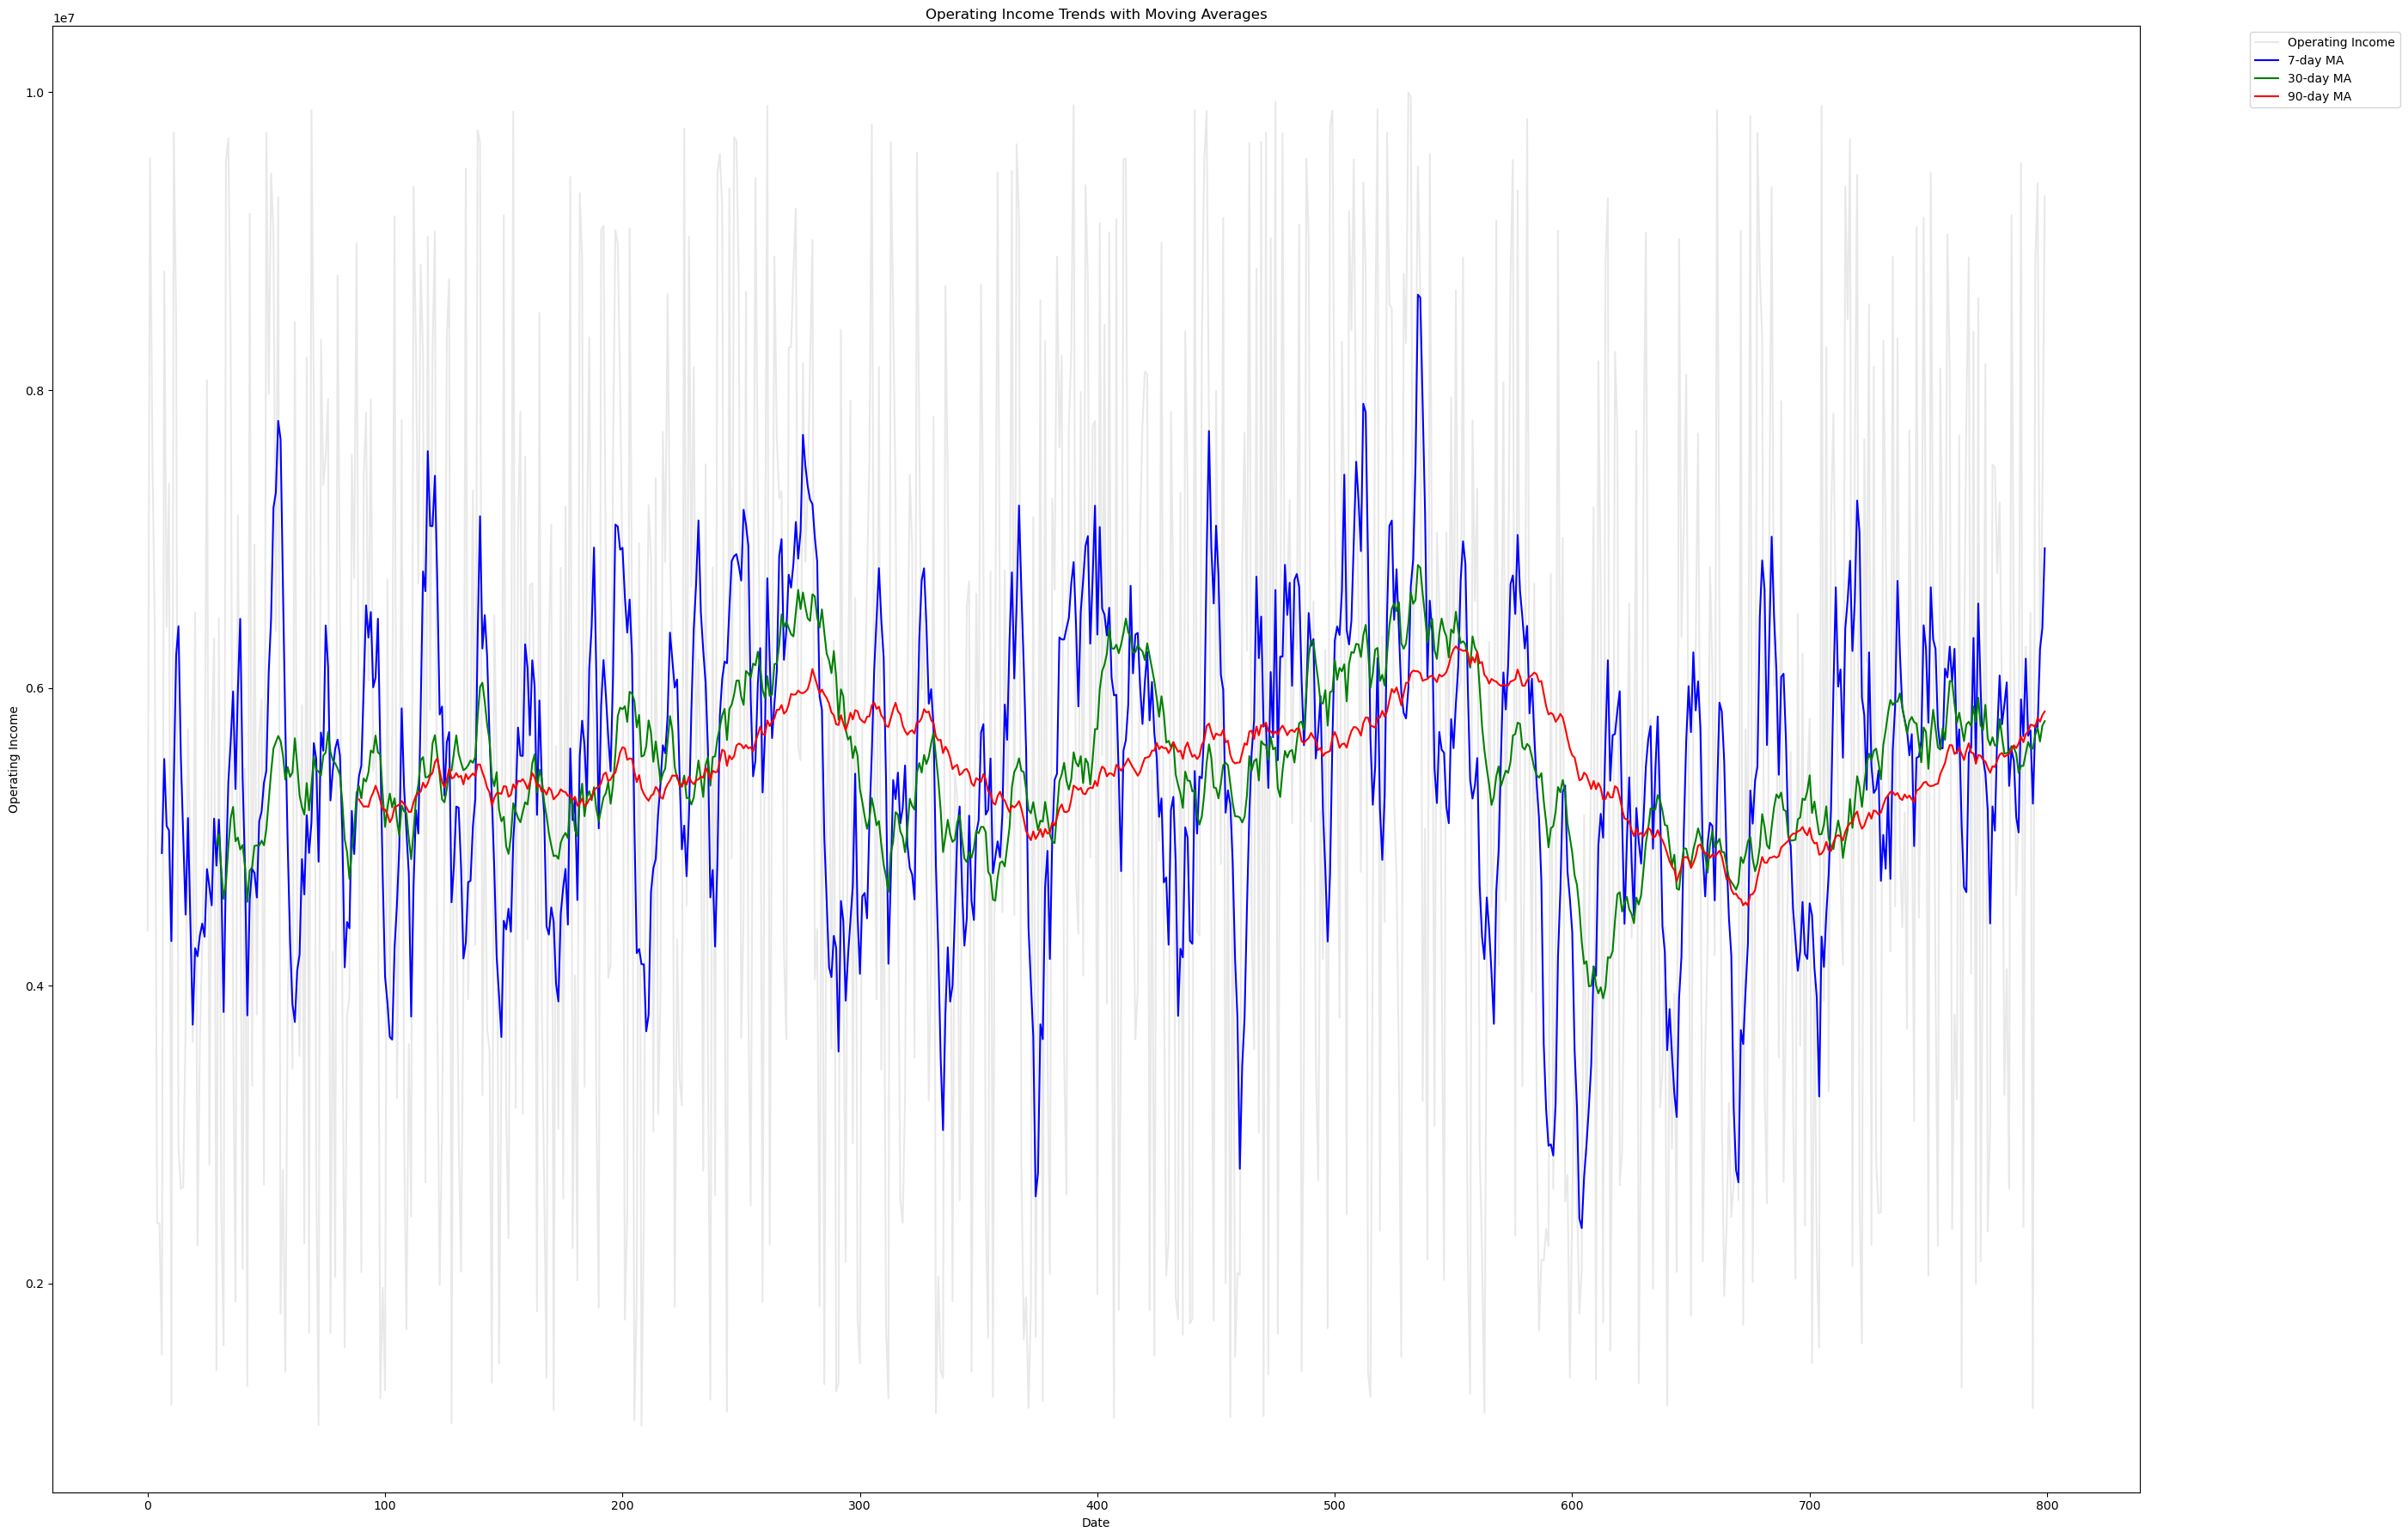

In [234]:
def analyze_trends():

    windows = [7, 30, 90]
    
    plot_df = pd.DataFrame({'Operating Income': df['Operating_Income']})
    
    for window in windows:
        plot_df[f'{window}-day MA'] = df['Operating_Income'].rolling(window=window).mean()
        
    plt.figure(figsize=(28, 18))
    
    sns.lineplot(data=plot_df['Operating Income'], 
                color='lightgray', 
                label='Operating Income',
                alpha=0.5)
    
    colors = ['blue', 'green', 'red']
    for window, color in zip(windows, colors):
        sns.lineplot(data=plot_df[f'{window}-day MA'],
                      color=color,
                    label=f'{window}-day MA')
    
    plt.title('Operating Income Trends with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Operating Income')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    plt.show()

analyze_trends()

#### performance metrics for ROA,Operating margin,expense ratio and Asset Turnover . performance for 30-day moving averages

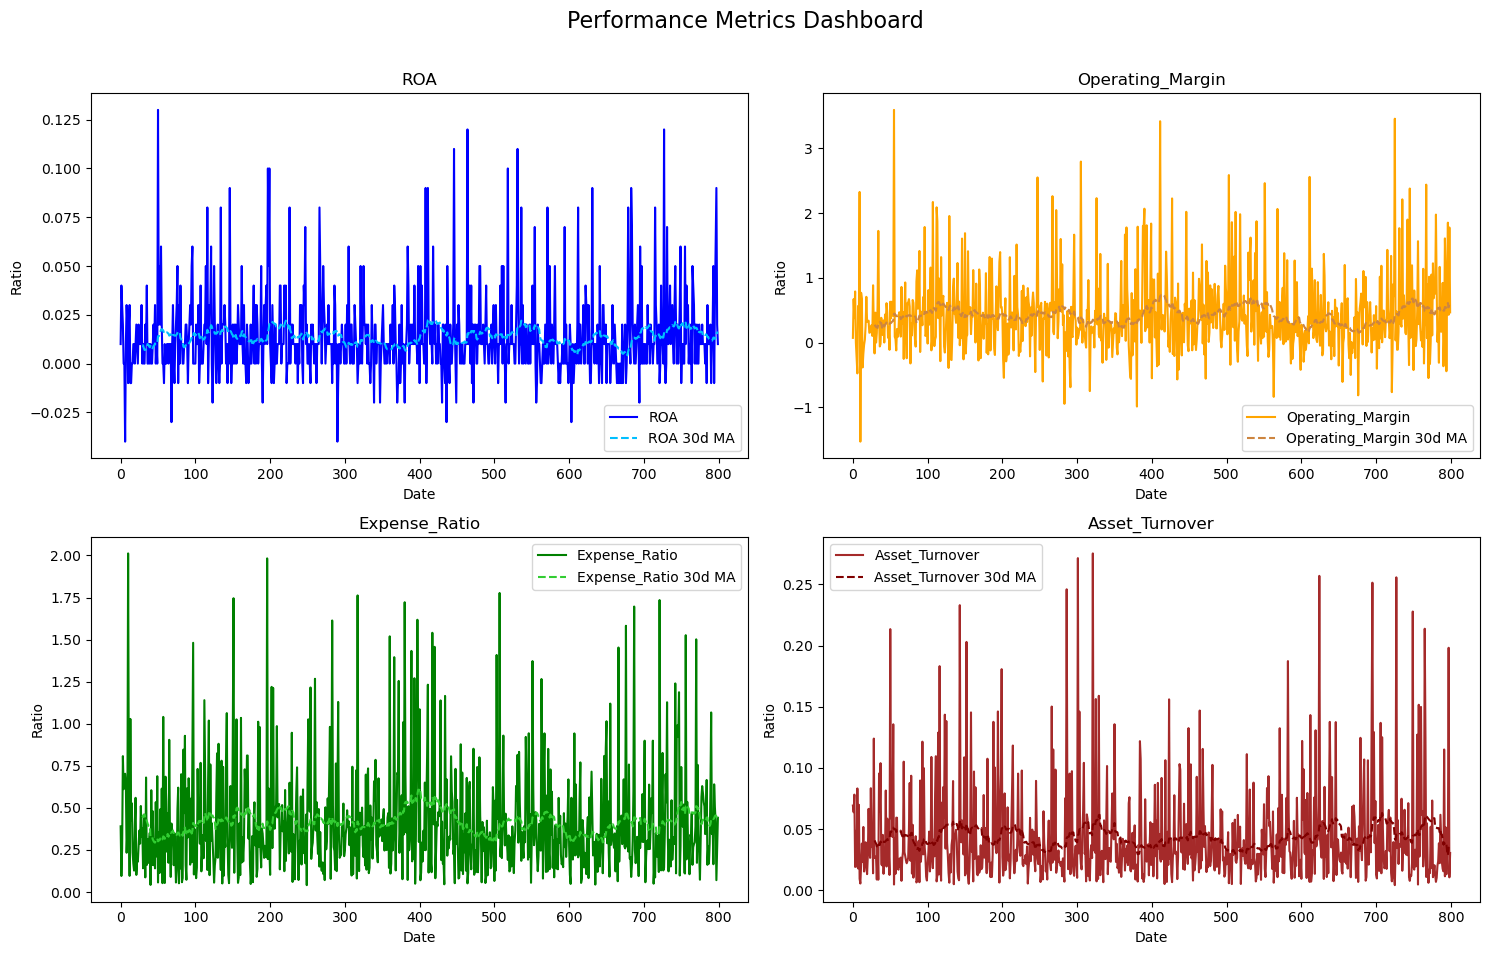

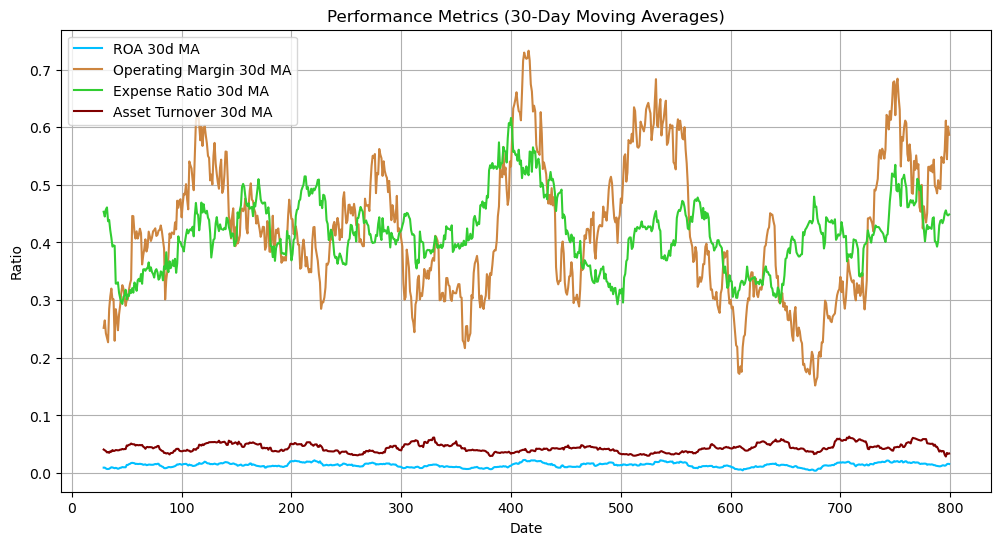

In [263]:
import pandas as pd
import matplotlib.pyplot as plt




df['Operating_Margin'] = (df['Operating_Income'] - df['Expenses']) / df['Revenue'] # Calculate and add 'Operating_Margin' to df


if 'Expense_Ratio' not in df.columns:
    df['Expense_Ratio'] = df['Expenses'] / df['Revenue'] 


if 'Asset_Turnover' not in df.columns:
    df['Asset_Turnover'] = df['Revenue'] / df['Assets']  # Replace with your actual calculation if different






fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Performance Metrics Dashboard", fontsize=16)

# Plot 1: ROA
axes[0, 0].plot(df.index, df['ROA'], label='ROA', color='blue')
axes[0, 0].plot(df.index, df['ROA'].rolling(window=30).mean(), linestyle='dashed', label='ROA 30d MA', color='deepskyblue')
axes[0, 0].set_title("ROA")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Ratio")
axes[0, 0].legend()

# Plot 2: Operating Margin
axes[0, 1].plot(df.index, df['Operating_Margin'], label='Operating_Margin', color='orange')
axes[0, 1].plot(df.index, df['Operating_Margin'].rolling(window=30).mean(), linestyle='dashed', label='Operating_Margin 30d MA', color='peru')
axes[0, 1].set_title("Operating_Margin")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Ratio")
axes[0, 1].legend()

# Plot 3: Expense Ratio
axes[1, 0].plot(df.index, df['Expense_Ratio'], label='Expense_Ratio', color='green')
axes[1, 0].plot(df.index, df['Expense_Ratio'].rolling(window=30).mean(), linestyle='dashed', label='Expense_Ratio 30d MA', color='limegreen')
axes[1, 0].set_title("Expense_Ratio")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Ratio")
axes[1, 0].legend()

# Plot 4: Asset Turnover
axes[1, 1].plot(df.index, df['Asset_Turnover'], label='Asset_Turnover', color='brown')
axes[1, 1].plot(df.index, df['Asset_Turnover'].rolling(window=30).mean(), linestyle='dashed', label='Asset_Turnover 30d MA', color='maroon')
axes[1, 1].set_title("Asset_Turnover")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Ratio")
axes[1, 1].legend()


plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust for the main title
plt.show()

plt.figure(figsize=(12, 6))
plt.title("Performance Metrics (30-Day Moving Averages)")

plt.plot(df.index, df['ROA'].rolling(window=30).mean(), label='ROA 30d MA', color='deepskyblue')
plt.plot(df.index, df['Operating_Margin'].rolling(window=30).mean(), label='Operating Margin 30d MA', color='peru')
plt.plot(df.index, df['Expense_Ratio'].rolling(window=30).mean(), label='Expense Ratio 30d MA', color='limegreen')
plt.plot(df.index, df['Asset_Turnover'].rolling(window=30).mean(), label='Asset Turnover 30d MA', color='maroon')

# Labels and legend
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.legend()
plt.grid(True)
plt.show()

### installing sqlalchemy and importing it, crating the database.

In [236]:
!pip install sqlalchemy

In [237]:
from sqlalchemy import create_engine
my_conn=create_engine("sqlite:////content/deutsche_bank_financial_performance.csv")

In [238]:
from sqlalchemy import create_engine, Column, Integer, Float, String, Date, MetaData, Table
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy.orm import declarative_base
Base = declarative_base()

import pandas as pd


Base = declarative_base()

class FinancialPerformance(Base):
    __tablename__ = 'financial_performance'
    id = Column(Integer, primary_key=True, autoincrement=True)
    date = Column(Date, nullable=False)
    operating_income = Column(Float)
    expenses = Column(Float)
    assets = Column(Float)
    liabilities = Column(Float)
    equity = Column(Float)
    revenue = Column(Float)
    cash_flow = Column(Float)
    net_income = Column(Float)
    debt_to_equity = Column(Float)
    roa = Column(Float)
    profit_margin = Column(Float)
    interest_expense = Column(Float)
    tax_expense = Column(Float)
    dividend_payout = Column(Float)


engine = create_engine('sqlite:///financial_data.db')
Base.metadata.create_all(engine)


df = pd.read_csv(r'C:\Users\snehi\OneDrive\datasets\deutsche_bank_financial_performance.csv')



df['Date'] = pd.to_datetime(df['Date'])


Session = sessionmaker(bind=engine)
session = Session()


data_to_insert = [
    FinancialPerformance(
        date=row['Date'],
        operating_income=row['Operating_Income'],
        expenses=row['Expenses'],
        assets=row['Assets'],
        liabilities=row['Liabilities'],
        equity=row['Equity'],
        revenue=row['Revenue'],
        cash_flow=row['Cash_Flow'],
        net_income=row['Net_Income'],
        debt_to_equity=row['Debt_to_Equity'],
        roa=row['ROA'],
        profit_margin=row['Profit_Margin'],
        interest_expense=row['Interest_Expense'],
        tax_expense=row['Tax_Expense'],
        dividend_payout=row['Dividend_Payout']
    )
    for _, row in df.iterrows()
]

session.bulk_save_objects(data_to_insert)
session.commit()


print("Data successfully inserted into the database!")


Data successfully inserted into the database!


### Define base for declarative models,Define SQLAlchemy model,Define the function for insights
#### 1. Average Net Income per Month
#### 2. Top 5 Days with the Highest Revenue
#### 3. Days where Expenses exceeded Revenue


In [239]:
from sqlalchemy import create_engine, text, Column, Float, Date
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy.orm import declarative_base
import pandas as pd


Base = declarative_base()


class FinancialData(Base):
    __tablename__ = 'financial_data'

    Date = Column(Date, primary_key=True)
    Operating_Income = Column(Float)
    Expenses = Column(Float)
    Assets = Column(Float)
    Liabilities = Column(Float)
    Equity = Column(Float)
    Revenue = Column(Float)
    Cash_Flow = Column(Float)
    Net_Income = Column(Float)
    Debt_to_Equity = Column(Float)
    ROA = Column(Float)
    Profit_Margin = Column(Float)
    Interest_Expense = Column(Float)
    Tax_Expense = Column(Float)
    Dividend_Payout = Column(Float)
    Net_Profit_Margin = Column(Float)
    Income_to_Expense = Column(Float)
    Debt_to_Assets = Column(Float)
    Equity_to_Assets = Column(Float)
    Interest_Coverage_Ratio = Column(Float)


engine = create_engine('sqlite:///financial_data.db')
Base.metadata.create_all(engine)


csv_path = r'C:\Users\snehi\OneDrive\datasets\deutsche_bank_financial_performance.csv'
df = pd.read_csv(csv_path)


df['Date'] = pd.to_datetime(df['Date'])


df.to_sql('financial_data', con=engine, if_exists='replace', index=False)



Session = sessionmaker(bind=engine)
session = Session()


def query_database_insights(session):
    """
    Queries the SQLite database for specific insights using SQLAlchemy.

    Args:
        session (sqlalchemy.orm.session.Session): SQLAlchemy session object.
    """

    
    print("\n1. Average Net Income per Month:")
    avg_net_income_per_month = session.execute(text("""
        SELECT strftime('%Y-%m', Date) AS Month, AVG(Net_Income) AS Average_Net_Income
        FROM financial_data
        GROUP BY Month
        ORDER BY Month
    """)).fetchall()
    for row in avg_net_income_per_month:
        print(f"Month: {row[0]}, Avg Net Income: {row[1]:.2f}")

    print("\n2. Top 5 Days with the Highest Revenue:")
    top_5_revenue_days = session.execute(text("""
         SELECT Date, Revenue
        FROM financial_data
        ORDER BY Revenue DESC
        LIMIT 5
    """)).fetchall()
    for row in top_5_revenue_days:
        print(f"Date: {row[0]}, Revenue: {row[1]:.2f}")


    print("\n3. Days where Expenses exceeded Revenue:")
    expense_exceed_revenue_days = session.execute(text("""
        SELECT Date, Expenses, Revenue
        FROM financial_data
        WHERE Expenses > Revenue
    """)).fetchall()
    if expense_exceed_revenue_days:
        for row in expense_exceed_revenue_days:
            print(f"Date: {row[0]}, Expenses: {row[1]:.2f}, Revenue: {row[2]:.2f}")
    else:
        print("No days found where expenses exceeded revenue.")


if __name__ == '__main__':
    query_database_insights(session)



1. Average Net Income per Month:
Month: 2015-01, Avg Net Income: 2120190.75
Month: 2015-02, Avg Net Income: 3037409.47
Month: 2015-03, Avg Net Income: 3036546.69
Month: 2015-04, Avg Net Income: 2805835.78
Month: 2015-05, Avg Net Income: 2501153.80
Month: 2015-06, Avg Net Income: 2599244.43
Month: 2015-07, Avg Net Income: 2705632.65
Month: 2015-08, Avg Net Income: 2979421.04
Month: 2015-09, Avg Net Income: 3474497.23
Month: 2015-10, Avg Net Income: 2256551.54
Month: 2015-11, Avg Net Income: 2650094.48
Month: 2015-12, Avg Net Income: 2042361.32
Month: 2016-01, Avg Net Income: 2594101.35
Month: 2016-02, Avg Net Income: 3110976.28
Month: 2016-03, Avg Net Income: 2589964.03
Month: 2016-04, Avg Net Income: 3376329.26
Month: 2016-05, Avg Net Income: 3309415.62
Month: 2016-06, Avg Net Income: 3674710.19
Month: 2016-07, Avg Net Income: 2778864.76
Month: 2016-08, Avg Net Income: 1412137.88
Month: 2016-09, Avg Net Income: 2653547.11
Month: 2016-10, Avg Net Income: 1421036.94
Month: 2016-11, Avg 

# split the data set and model buliding

In [240]:
df['Operating_Margin'] = df['Operating_Income'] / df['Revenue']

In [241]:
df[['Operating_Income', 'Revenue', 'Operating_Margin']].head()

,Operating_Income,Revenue,Operating_Margin
0,4370861.07,9435946.42,0.463214
1,9556428.76,12470620.28,0.766315
2,7587945.48,11882092.09,0.638603
3,6387926.36,4000698.76,1.596703
4,2404167.76,3940243.11,0.610157


In [242]:
X = df[['Operating_Income', 'Expenses', 'Assets', 'Liabilities', 'Equity', 'Revenue', 'Cash_Flow', 'Debt_to_Equity', 'ROA', 'Profit_Margin', 'Interest_Expense', 'Tax_Expense', 'Dividend_Payout', 'Operating_Margin']]
y = df['Net_Income']

In [243]:
X

,Operating_Income,Expenses,Assets,Liabilities,Equity,Revenue,Cash_Flow,Debt_to_Equity,ROA,Profit_Margin,Interest_Expense,Tax_Expense,Dividend_Payout,Operating_Margin
0,4370861.07,3682573.85,1.363403e+08,1.494296e+08,59803407.08,9435946.42,1428845.20,2.50,0.01,0.07,609472.14,1042103.16,1170151.42,0.463214
1,9556428.76,1186425.69,1.955172e+08,4.725052e+07,55281922.53,12470620.28,1029017.28,0.85,0.04,0.67,699770.11,1329539.73,492998.93,0.766315
2,7587945.48,3093297.62,1.519954e+08,1.756590e+08,27447676.11,11882092.09,7320721.28,6.40,0.03,0.38,337977.34,345091.11,1603358.92,0.638603
3,6387926.36,3230217.71,2.097483e+08,1.382626e+08,87293509.41,4000698.76,1925965.75,1.58,0.02,0.79,1345468.95,1316373.62,426566.77,1.596703
4,2404167.76,2408588.02,8.124073e+07,2.773058e+08,70924670.47,3940243.11,6659376.16,3.91,0.00,0.00,175614.54,136655.30,2808563.51,0.610157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,8849115.18,3102741.13,2.056449e+08,2.121410e+08,49789633.12,6165216.72,4084005.16,4.26,0.03,0.93,627993.14,835552.46,892162.90,1.435329
796,9389064.54,1733723.00,1.195069e+08,3.776259e+08,40096106.11,4135728.96,3164629.81,9.42,0.06,1.85,1046559.67,240065.80,707605.75,2.270232
797,6086198.65,857387.16,6.145149e+07,3.530014e+08,45511508.38,12181098.60,5618837.98,7.76,0.09,0.43,726107.79,1160927.80,1420453.37,0.499643
798,7269857.41,885462.12,3.406201e+08,5.897583e+07,57694652.82,3592472.21,5466741.19,1.02,0.02,1.78,937145.92,1402043.77,2734468.89,2.023636


In [244]:
y

0       688287.22
1      8370003.06
2      4494647.86
3      3157708.65
4        -4420.26
          ...    
795    5746374.05
796    7655341.54
797    5228811.49
798    6384395.29
799    4778635.49
Name: Net_Income, Length: 800, dtype: float64

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [247]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 14)
(160, 14)
(640,)
(160,)


## Linear Regression

In [248]:
from sklearn.linear_model import LinearRegression

# Initialize the regression model
lr = LinearRegression()

# Fit the regression model
lr.fit(X_train, y_train)

LinearRegression()

In [249]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [250]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [251]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [252]:
mean_absolute_error(y_test,y_test_pred)

0.002670562008466959

In [253]:
mean_squared_error(y_test,y_test_pred)

2.2421383069657877e-05

In [254]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,y_test_pred))
rmse

0.004735122286663554

## performance metrics
### 1. r2-score
### 2. adjustedr2-score

In [255]:
from sklearn.metrics import r2_score

In [256]:
r2_score(y_test,y_test_pred)

1.0

# Interpretation



**_Basic Python Programming:_**

**_1. Variables and Lists:_**

*Basic Python operations are demonstrated, such as creating variables, lists, and dictionaries.*

**_2. Loop and Conditional Statements:_**

*A loop is used to iterate over financial data, and conditional statements are applied to classify profits as "strong" or "moderate."*



**_Data Reading and Inspection_**

#### **_1. Data Loading:_**

*The dataset is loaded using `pandas`, and the first few rows are displayed to inspect the structure.*

#### **_2. Data Shape:_**

*The dataset has 800 rows and 16 columns, indicating a substantial amount of financial data over time.*

#### **_3. Data Description:_**

*Basic statistics (mean, min, max, etc.) are calculated for numerical columns, providing an overview of the distribution of financial metrics.*



**_Data Cleaning and Preprocessing_**

#### **_1. Missing Values:_**

*The dataset is checked for missing values, and none are found, indicating that the data is complete.*

*For handling missing values, there are no missing values, so I didn’t proceed to further steps like: fillna, interpolate, or SimpleImputer.*

*In the dataset, there is no text, so I didn't go through the encoding of categorical data like: get_dummies(), label encoder, and OneHotEncoder.*

#### **_2. Date Conversion:_**

*The `Date` column is converted to a datetime format, ensuring proper handling of time-series data.*

#### **_3. Duplicates:_**

*No duplicate rows are found, confirming data integrity.*

#### **_4. Yearly Profit Analysis:_**

*A function is defined to analyze yearly profit trends. The data is grouped by year, and total profits are calculated. The results show that profits were positive in all years (2015, 2016, and 2017).*



**_Mathematical Operations_**

#### **_Total net income, average operating income, and average expenses:_**

*Total net income, average operating income, and average expenses are calculated. A new column, `Net_Income_Percentage`, is added to show net income as a percentage of revenue.*



**_Data Visualization_**### **_1. Yearly Net Income Trend:_**

*A line plot shows the trend of net income over the years. The plot reveals that net income was relatively stable in 2015 and 2016 but dropped significantly in 

**_performance metrics dashbord:_**

*This plot shows the four performance meterics  on dashboard are ROA,operating_margin,expensen_ratio,Asset_turnover and also graph represents the 30 day performance metrics.*20

#### **_2. Net Income Distribution:_**

*A histogram with a kernel density estimate (KDE) shows the distribution of net income. The distribution is right-skewed, indicating that most net income values are concentrated on the lower end, with a few high ours.*

#### **_3. Correlation Heatmap:_**

*A heatmap visualizes the correlation between numerical variables. Strong positive correlations are observed between `Operating_Income` and `Net_Income`, and between `Profit_Margin` and `Net_Income_Pntage`.*

#### **_4. Boxplot of Net Income by Year:_**

*A boxplot shows the distribution of net income for each year. The plot reveals that 2017 had a wider spread of net income values, including some extreme outliers.*



**_SQL Integration_**#### **_1. SQLAlchemy:_**

*The dataset is loaded into an SQLite database using SQLAlchemy. This allows for more complex queries and data manipulation using S

#### **_2. Database Insights:_**

*Several SQL queries are executed to gain ints.*

#### **_3. Average Net Income per Month:_**

*The average net income is calculated for each month, showing fluctuationsr time.*

#### **_4. Top 5 Days with Highest Revenue:_**

*The days with the highest revenue are identified, providing insights into peak perfoce periods.*

#### **_5. Days Where Expenses Exceeded Revenue:_**

*The days where expenses were higher than revenue are listed, highlighting potential inefficiencies or losses.*



**_Model Building_**

#### **_1. Feature Engineering:_**

*A new feature, `Operating_Margin`, is created by dividing operating income by revenue. This metric provides insight into the efficiency of the bank's core operations.*

#### **_2. Linear Regression:_**

*A linear regression model is built to predict net income based on features like operating income, expenses, assets, liabilities, equity, and revenue. The model is trained and tested, and performance metrics (MAE, MSE, RMSE, R²) are calculated.*

#### **_3. Model Performance:_**

*The model achieves an R² score of 1.0, indicating a perfect fit. However, this may suggest overfitting, and further validation is needed.*

# Report

## Introduction



*The chosen dataset represents the financial performance of Deutsche Bank over a period from January 2015 to March 2017. It includes 800 records with key financial metrics such as operating income, expenses, net income, assets, liabilities, equity, and various financial ratios like Return on Assets (ROA) and Debt-to-Equity ratio. This dataset is suitable for financial analysis, modeling, and machine learning projects, particularly for tasks like performance evaluation, ratio analysis, and forecasting.*

*The business scenario revolves around understanding the bank's financial health, identifying trends in profitability, and making data-driven decisions to improve financial performance. The dataset can help stakeholders assess the bank's operational efficiency, liquidity, and overall financial stability.*

## Methodology



**_Data Import and Initial Inspection:_**

*The dataset was imported using pandas and inspected for basic information such as shape, data types, and missing values.*

*The dataset contains 800 rows and 16 columns, with no missing values.*

**_Data Cleaning and Preprocessing:_**

*The Date column was converted to a datetime format to facilitate time-based analysis.*

*Additional columns like Year were extracted from the Date column for yearly analysis.*

*A new column, Net_Income_Percentage, was created to represent net income as a percentage of revenue.*

**_Exploratory Data Analysis (EDA):_**

*Summary statistics were generated to understand the distribution of key financial metrics.*

*Yearly profit trends were analyzed by grouping data by year and summing up net income.*

*A correlation heatmap was created to identify relationships between different financial metrics.*

**_Data Visualization:_**

*Line plots were used to visualize yearly net income trends.*

*Histograms and boxplots were created to understand the distribution of net income and its variation across years.*

*Moving averages were calculated and plotted to identify trends in operating income over time.*

**_Model Building:_**

*The dataset was split into training and testing sets for predictive modeling.*

*A linear regression model was built to predict net income based on features like operating income, expenses, assets, liabilities, equity, and revenue.*

*Model performance was evaluated using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.*

**_Database Integration:_**

*The dataset was loaded into an SQLite database using SQLAlchemy for further querying and analysis.*

*SQL queries were executed to derive insights such as average net income per month, top revenue days, and days where expenses exceeded revenue.*

## Findings



**_Yearly Profit Trends:_**

*The bank's net income showed a positive trend over the years, with the highest profit recorded in 2016.*

*The total net income for 2015, 2016, and 2017 was approximately 977.8 million, 981.9 million, and 217.9 million euros, respectively.*

**_Correlation Analysis:_**

*Net income showed a strong positive correlation with operating income and revenue.*

*Debt-to-Equity ratio had a moderate correlation with liabilities, indicating that higher liabilities relative to equity could impact financial stability.*

**_Model Performance:_**

*The linear regression model performed exceptionally well, with an R-squared value of 1.0, indicating a perfect fit for the training data.*

*The model's predictions on the test data had a very low error rate, with an MAE of 0.0027 and an RMSE of 0.0047.*

**_Database Insights:_**

*The average net income per month varied significantly, with the highest averages observed in 2016.*

*The top 5 days with the highest revenue were identified, with revenues exceeding 14.9 million euros on those days.*

*Several days were identified where expenses exceeded revenue, indicating potential inefficiencies or financial stress on those days.*

## Conclusion



**_Analysis of Deutsche Bank's Financial Performance:_**

*The analysis of Deutsche Bank's financial performance dataset from January 2015 to March 2017 provides valuable insights into the bank's financial health and operational efficiency. Key findings include:*

**_Positive Profit Trends:_**

*The bank maintained a positive net income trend over the years, with 2016 being the most profitable year. This indicates that the bank was able to generate consistent profits during this period.*

**_Strong Predictors of Net Income:_**

*Operating income and revenue were identified as the strongest predictors of net income, highlighting the importance of core business operations in driving profitability.*

**_Expense Management:_**

*The analysis revealed several days where expenses exceeded revenue, suggesting potential inefficiencies or financial stress on those days. This is an area that requires further investigation to improve cost management and operational efficiency.*

**_Model Performance:_**

*The linear regression model used to predict net income performed exceptionally well, with an R-squared value of 1.0 and low error rates (MAE: 0.0027, RMSE: 0.0047). This demonstrates the model's accuracy and reliability in forecasting financial performance.*

**_Correlation Insights:_**

*The Debt-to-Equity ratio showed a moderate correlation with liabilities, indicating that higher liabilities relative to equity could impact financial stability. Monitoring this ratio is crucial for maintaining a healthy balance between debt and equity.*

## Recommendations



**_Optimize Operational Efficiency:_**

*Focus on reducing expenses on days where they exceed revenue to improve profitability.*

*Implement cost-control measures to ensure expenses remain within budget.*

**_Monitor Key Financial Ratios:_**

*Regularly monitor Debt-to-Equity and ROA to ensure long-term financial stability.*

*Maintain a healthy balance between debt and equity to avoid over-leveraging.*

**_Leverage Predictive Models:_**

*Use predictive models to forecast future financial performance and make informed strategic decisions.*

*Continuously refine the model by incorporating additional features and data.*

**_Investigate Days with High Expenses:_**

*Analyze the days where expenses exceeded revenue to identify the root causes of inefficiencies.*

*Implement corrective actions to prevent similar occurrences in the future.*